In [10]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abdullah0a/retail-sales-data-with-seasonal-trends-and-marketing")


In [21]:
# 1. Завантаження даних
for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith(".csv"):
            csv_path = os.path.join(root, file)
            break
            
data = pd.read_csv(csv_path)
print(data.isnull().sum())
data = data.dropna()
print(data.isnull().sum())

YEAR                 0
MONTH                0
SUPPLIER            33
ITEM CODE            0
ITEM DESCRIPTION     0
ITEM TYPE            0
RETAIL SALES         1
RETAIL TRANSFERS     0
WAREHOUSE SALES      0
dtype: int64
YEAR                0
MONTH               0
SUPPLIER            0
ITEM CODE           0
ITEM DESCRIPTION    0
ITEM TYPE           0
RETAIL SALES        0
RETAIL TRANSFERS    0
WAREHOUSE SALES     0
dtype: int64


In [22]:
data = pd.get_dummies(data, columns=['SUPPLIER', 'ITEM TYPE'], drop_first=True)
data

,YEAR,MONTH,ITEM CODE,ITEM DESCRIPTION,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,SUPPLIER_ADAMBA IMPORTS INTL,SUPPLIER_AIKO IMPORTERS INC,SUPPLIER_ALLAGASH BREWING COMPANY,...,SUPPLIER_YUENGLING BREWERY,SUPPLIER_Z WINE GALLERY IMPORTS LLC,SUPPLIER_ZURENA LLC,ITEM TYPE_DUNNAGE,ITEM TYPE_KEGS,ITEM TYPE_LIQUOR,ITEM TYPE_NON-ALCOHOL,ITEM TYPE_REF,ITEM TYPE_STR_SUPPLIES,ITEM TYPE_WINE
0,2020,1,100009,BOOTLEG RED - 750ML,0.00,0.0,2.0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2020,1,100024,MOMENT DE PLAISIR - 750ML,0.00,1.0,4.0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,2020,1,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,0.00,0.0,1.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2020,1,100145,SCHLINK HAUS KABINETT - 750ML,0.00,0.0,1.0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,2020,1,100293,SANTORINI GAVALA WHITE - 750ML,0.82,0.0,0.0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2020,3,352322,FORTALEZA ANEJO TEQUILA - 750ML,0.33,0.0,0.0,False,False,False,...,False,False,False,False,False,True,False,False,False,False
29996,2020,3,352324,DOMAINE BRICHOT BLANC - 750ML,0.00,0.0,0.0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
29997,2020,3,352354,LOTE 44 MALBEC - 750ML,0.00,0.0,6.0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
29998,2020,3,35238,SKYY VODKA - 1.75L,329.04,302.0,0.0,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [23]:
X = data.drop(columns=['RETAIL SALES', 'ITEM DESCRIPTION', 'ITEM CODE'])  # Незалежні змінні
y = data['RETAIL SALES']  # Залежна змінна

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
y_pred = model.predict(X_test)
y_pred

array([ 5.875     ,  0.06640625,  0.671875  , ..., -0.140625  ,
        1.3515625 ,  1.375     ])

In [31]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Середньоквадратична помилка (MSE): {mse}")
print(f"Коефіцієнт детермінації (R²): {r2}")

Середньоквадратична помилка (MSE): 39.21305867310181
Коефіцієнт детермінації (R²): 0.9494833989118668


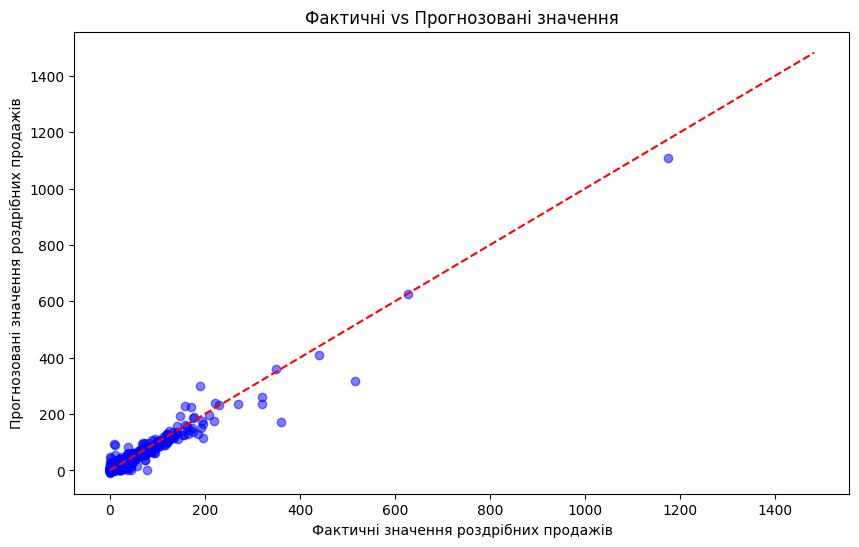

In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel("Фактичні значення роздрібних продажів")
plt.ylabel("Прогнозовані значення роздрібних продажів")
plt.title("Фактичні vs Прогнозовані значення")
plt.show()

In [33]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Коефіцієнт'])
print("Коефіцієнти регресійної моделі:")
print(coeff_df.sort_values(by='Коефіцієнт', ascending=False))

Коефіцієнти регресійної моделі:
                                             Коефіцієнт
YEAR                                       1.170573e+10
SUPPLIER_Default                           9.254780e+04
SUPPLIER_HAMCO DC                          9.251970e+04
SUPPLIER_KAHN PAPER COMPANY INC            9.249251e+04
SUPPLIER_TRUE RESPITE BREWING COMPANY LLC  2.047228e+01
...                                                 ...
SUPPLIER_INFINIUM SPIRITS INC             -6.858201e+00
SUPPLIER_AZABU DISTILLING CO LLC          -7.903006e+00
SUPPLIER_CITIZENS BREWING LLC             -1.231157e+01
ITEM TYPE_REF                             -9.254374e+04
ITEM TYPE_STR_SUPPLIES                    -9.254605e+04

[300 rows x 1 columns]


In [2]:
import pandas as pd
import sqlite3
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Завантаження даних
file_path = 'Retail_and_wherehouse_Sale.csv'
data = pd.read_csv(file_path)

# Створення нової колонки з числами та позначками з ITEM_DESCRIPTION
data['ITEM_DESCRIPTION_NUM'] = data['ITEM_DESCRIPTION'].str.extract(r'(\d+\.?\d*)').astype(float)

data['ITEM_DESCRIPTION_NUM'].head(100)

0     750.0
1     750.0
2      18.7
3     750.0
4     750.0
      ...  
95    375.0
96    375.0
97    375.0
98    750.0
99    750.0
Name: ITEM_DESCRIPTION_NUM, Length: 100, dtype: float64